# 4.3.2 [실습] 농구선수의 게임 기록을 학습해서 포지션을 예측해보자

## 최적의 SVM 파라미터 찾기

In [17]:
import pandas as pd

train = pd.read_csv(
    "https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv"
)
test = pd.read_csv(
    "https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv"
)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np

In [19]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
        {
            "kernel": ["rbf"],
            "gamma": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
            "C": [0.01, 0.1, 1, 10, 100, 1000],
        }
    ]

    clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds)
    clf.fit(X, y)
    print(clf.best_params_)

    return clf

In [20]:
X_train = train[["3P", "BLK"]]
y_train = train[["Pos"]]

clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


## 결정 경계선 시각화

c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\Hyeonsik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warni

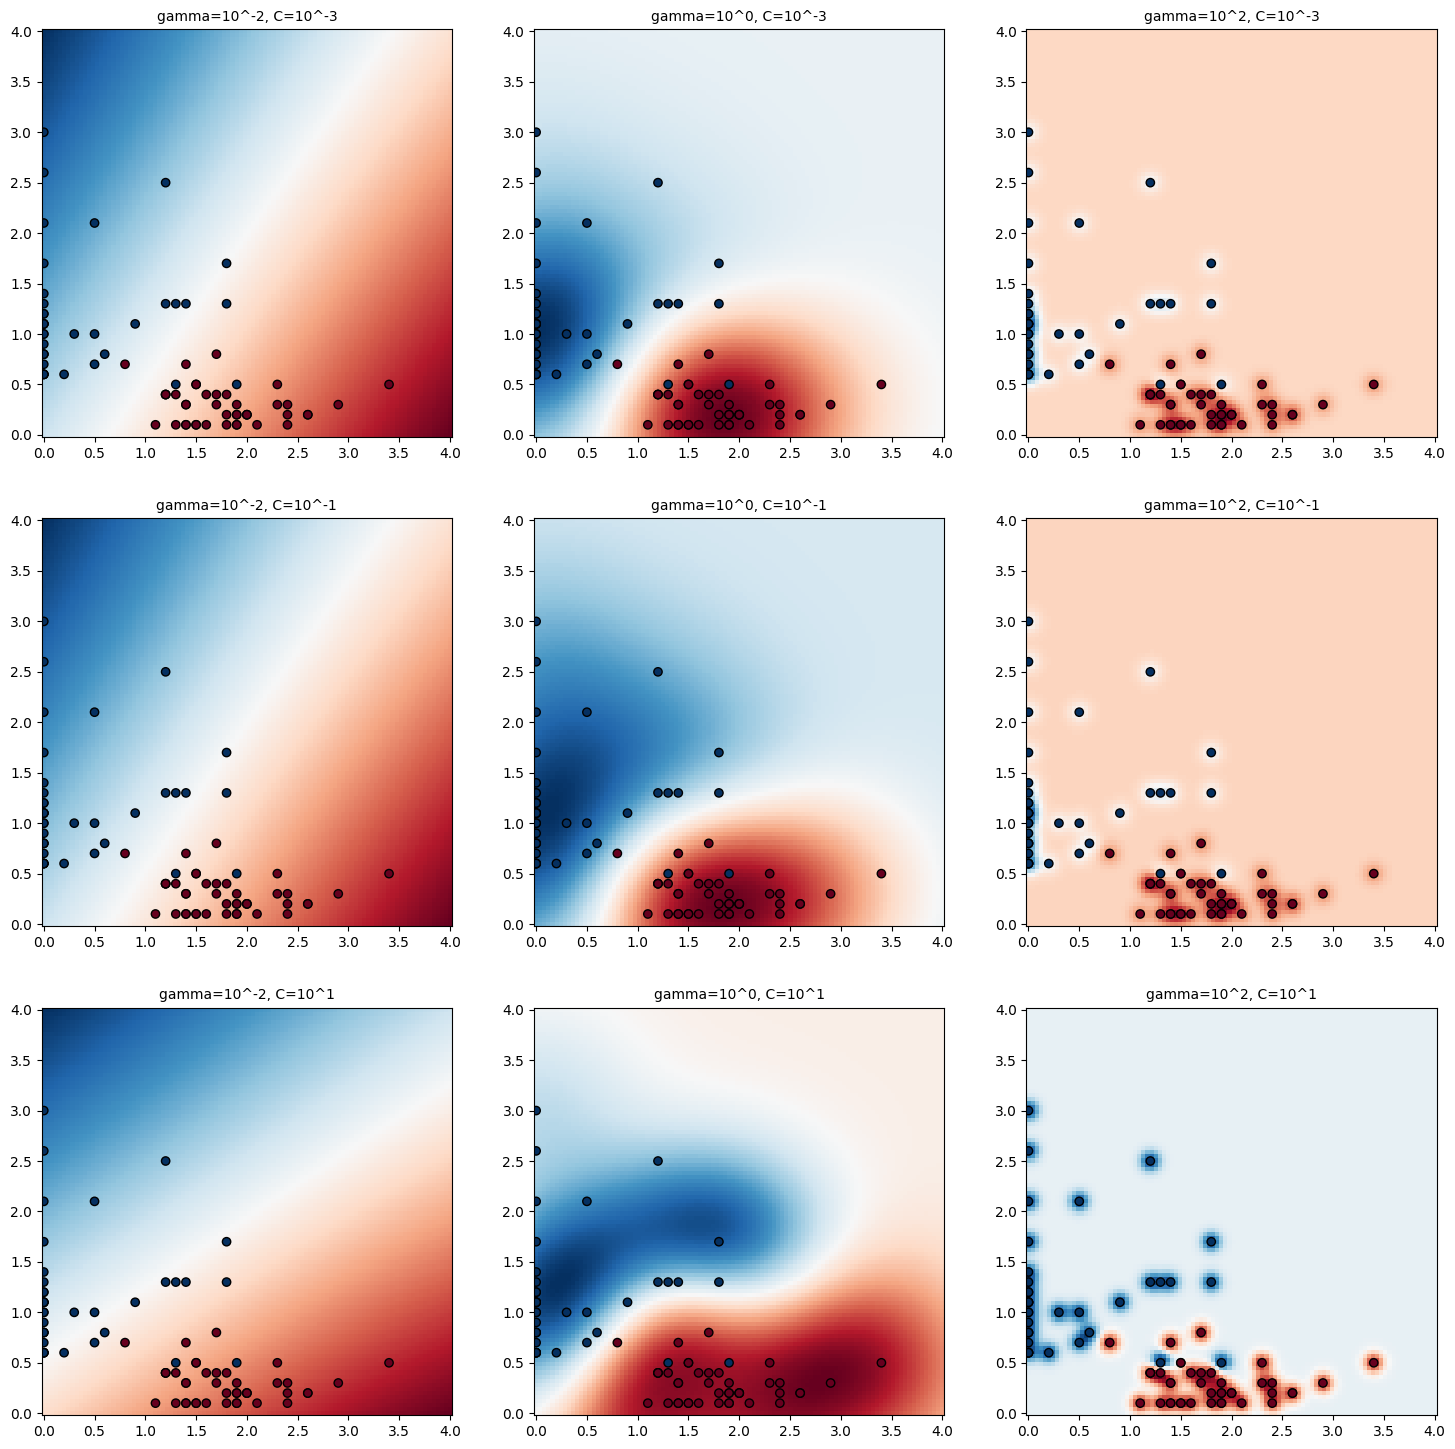

In [21]:
import matplotlib.pyplot as plt

C_candidates = []
C_candidates.append(clf.best_params_["C"] * 0.01)
C_candidates.append(clf.best_params_["C"])
C_candidates.append(clf.best_params_["C"] * 100)

gamma_candidates = []
gamma_candidates.append(clf.best_params_["gamma"] * 0.01)
gamma_candidates.append(clf.best_params_["gamma"])
gamma_candidates.append(clf.best_params_["gamma"] * 100)

X = train[["3P", "BLK"]]
Y = train["Pos"].tolist()

position = []
for gt in Y:
    if gt == "C":
        position.append(0)
    else:
        position.append(1)

classifiers = []

for C in C_candidates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

for k, (C, gamma, clf) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(len(C_candidates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)), size="medium")

    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X["3P"], X["BLK"], c=position, cmap=plt.cm.RdBu_r, edgecolors="k")

## 모델 테스트

In [22]:
X_test = test[["3P", "BLK"]]
y_test = test[["Pos"]]

y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : " + str(accuracy_score(y_true, y_pred)))

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20


accuracy : 0.95


In [23]:
comparison = pd.DataFrame({"prediction": y_pred, "ground_truth": y_true.values.ravel()})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C
